In [ ]:
# iris 데이터  sklearn 패키지 제공되는 기본샘플 데이터

In [ ]:
#### 목표
 #iris 데이터를 활용해서 붓꽃 품종 분류
 #붓꽃 품좀이 3개 신경망에서 다중분류 학습 진행


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential  # 올바른 경로
from tensorflow.keras.layers import Dense       # 올바른 경로
from sklearn.datasets import load_iris          # 오타 수정


In [ ]:
from sklearn.datasets import load_iris

# Iris 데이터 로드
iris = load_iris()

# 데이터와 타겟을 불러오기
X = iris.data  # 특성 데이터 (꽃받침, 꽃잎의 길이와 너비)
y = iris.target  # 타겟 데이터 (Iris 품종)

# 데이터 확인
print(X[:5])  # 첫 5개의 데이터 확인
print(y[:5])  # 첫 5개의 타겟 확인


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [ ]:
#딕셔너리 형태로사용 번치
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
iris

In [ ]:
iris['data']
iris.data.data.shape
#데이터 타입 float(숫자)
# 전체크기정보 : 행150,열(특성)4


(150, 4)

In [ ]:
iris.feature_names
#['sepal length (cm)',: 꽃받침 길이
 #'sepal width (cm)',    꽃받침너비
 #'#petal length (cm)', 꽃잎 길이
 #'petal width (cm)']   꽃입 너비
 # 위 데이터에 따라서 iris(붓꽃) 품종에 대해서 분류가 가능하구나

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#붓꽃의  품종은 총 몇개인가? 클래스-> 개수
# 답 데이터
iris.target
ft_size = np.unique(iris.target).size
print("클래스의 개수:", ft_size)


클래스의 개수: 3


In [ ]:
np.unique(iris.target, return_counts = True)


(array([0, 1, 2]), array([50, 50, 50]))

In [ ]:
# 클래스 실제 이름
#0 - setosa
#1 - versicolor
#2 - virginica

iris.target_names
#:Number of Instances 행의개수
#Number of Attributes: 속성의 개수

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# DESCR
# 데이터 정보 확인
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- 데이터 정리하기
  - X, y 분리: 이미 분리가 되어 있음(x)
  - 훈련셋, 테스트셋 분리
   -7.5:2.5
   -rd =3
   -크기확인

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state =3)

In [ ]:
# X(문제)
X = iris.data
# y(답)
y = iris.target
#그래서 굳이 담지않아도된다



In [ ]:
print("훈련셋:", X_train.shape, y_train.shape)
print("테스트셋:", X_test.shape, y_test.shape)


훈련셋: (112, 4) (112,)
테스트셋: (38, 4) (38,)


In [ ]:
# 다중분류 문제를 해결하고자함
# 답데이터 전처리
# 모델 내부적으로 여러 클래스에 대해서 실제답 예측값 확률간의 오차를 계산하는 것이 필요함
# >>> 답 데이터 원핫인코딩 처리하기
y_train_oh = pd.get_dummies(y_train)
y_test_oh = pd.get_dummies(y_test)
y_train_oh.values#원래는배열인데 얘는 2차원으로 뽑아주네  tensorflow 이해할 수 있음

array([[False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [Fa

In [ ]:
# 원핫인코딩 진행하는 tensorflow 도구 사용하기
# pd.get_dummies()
from tensorflow.keras.utils import to_categorical
# to_categorical(대상)
to_categorical(y_train)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0

- keras 인공신경망 구축
 -1. 신경망 구조설계
 -2. 학습/평가 방법 설계
 -3. 학습 및 현황 시각화
 -4. 모델 예측 및 평가

In [ ]:
# 1. 뼈대 구축
multiple_model = Sequential()
# 2. 입력 + 중간
multiple_model.add(Dense(input_dim=4,units=4, activation='relu'))

# 중간층 자유롭게 쌓아보자
multiple_model.add(Dense(8, activation='adam'))
multiple_model.add(Dense(4, activation='adam'))

# 출력층
# 회귀 units =1 , activaition='linear'(생략가능)
# 이진분류 units =1 ,activaition='sigmoid'
# 다중분류 unitis=클래스의 수(ft-size = 3), activaition = 'softmax'
# softmax 각 클래스의 예측 확률을 더했을 때 1이되게 예측 확률을변환해주는 활성화 함수
multiple_model.add(Dense(3, activation = "softmax"))

# 모델 정보 요약
multiple_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Could not interpret activation function identifier: adam

In [ ]:
# 2. 학습/평가방법설정
#compile
#loss
#-회귀:'mse'
#-이진분류:'binary_crossentropy'
#-다중분류:'categorical_crossentropy'
#optimizer
#- 경사하강법: 'sgd'
#- 다양한 종류가 존재함
#- accuracy
multiple_model.compile(loss= 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
# 3. 학습
# 반복횟수 200
# 학습현황 h1 변수 담아주기
h1 = multiple_model.fit(X_train,y_train_oh,epochs=1000)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9705 - loss: 0.0816
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9612 - loss: 0.0889 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9814 - loss: 0.0738 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9887 - loss: 0.0529 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0670 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9908 - loss: 0.0433 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9793 - loss: 0.0706 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9793 - loss: 0.0638 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9912 - loss: 0.0643 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9912 - loss: 0.0530 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9908 - loss: 0.0478 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0

In [ ]:
#h1의 loss, acc시각화
h1_loss = h1.history['loss']
h1_accuracy = h1.history['accuracy']


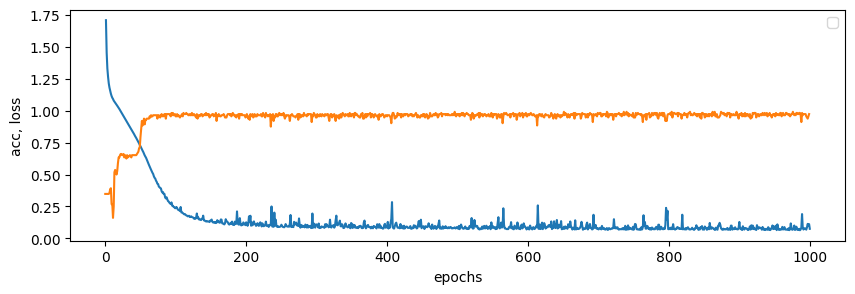

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3)) # x,y 축크기
plt.plot(range(1,1001), h1_loss, h1_accuracy)
plt.xlabel("epochs")
plt.ylabel("acc, loss")
plt.legend()
#반복되는 과정중에 w,b가 더 좋은 쪽으로()
#actuvautuib;sigmoid->relu:"오차에 대한 정보를 제대로 전달하기위한 설정"
# optimizer ='sgd' -> adam : 더 최적의 w,b를 빠르고 확실하게 찾아나가도록 설정